In [213]:
import os, numpy as np, pandas as pd, seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.cluster import KMeans
from matplotlib.colors import LogNorm
!pip install bioinfokit -q
from bioinfokit.visuz import cluster

# Part 1

In [214]:
ewcs = pd.read_csv('EWCS_2016.csv')
ewcs.head()

,Q2a,Q2b,Q87a,Q87b,Q87c,Q87d,Q87e,Q90a,Q90b,Q90c,Q90f
0,1,63,3,3,3,3,3,2,2,2,2
1,2,58,2,3,2,3,2,2,3,2,2
2,2,32,2,2,3,2,3,2,2,2,2
3,1,35,3,2,2,2,3,2,2,2,2
4,2,27,2,2,3,3,2,2,4,2,2


In [215]:
ewcs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Q2a     7813 non-null   int64
 1   Q2b     7813 non-null   int64
 2   Q87a    7813 non-null   int64
 3   Q87b    7813 non-null   int64
 4   Q87c    7813 non-null   int64
 5   Q87d    7813 non-null   int64
 6   Q87e    7813 non-null   int64
 7   Q90a    7813 non-null   int64
 8   Q90b    7813 non-null   int64
 9   Q90c    7813 non-null   int64
 10  Q90f    7813 non-null   int64
dtypes: int64(11)
memory usage: 671.6 KB


In [216]:
print('Data statistics #1')
ewcs.describe(include='all').T

Data statistics #1


,count,mean,std,min,25%,50%,75%,max
Q2a,7813.0,1.362985,11.329936,-999.0,1.0,1.0,2.0,2.0
Q2b,7813.0,41.799821,41.000523,-999.0,34.0,43.0,52.0,87.0
Q87a,7813.0,-1.152694,59.857251,-999.0,2.0,2.0,3.0,6.0
Q87b,7813.0,-0.590810,56.584189,-999.0,2.0,2.0,3.0,6.0
Q87c,7813.0,-1.164085,59.857237,-999.0,2.0,2.0,3.0,6.0
Q87d,7813.0,-0.608217,57.708142,-999.0,2.0,2.0,3.0,6.0
Q87e,7813.0,-3.480353,76.627067,-999.0,2.0,2.0,3.0,6.0
Q90a,7813.0,-1.970050,63.948641,-999.0,2.0,2.0,3.0,5.0
Q90b,7813.0,-1.901574,63.955457,-999.0,1.0,2.0,3.0,5.0
Q90c,7813.0,-1.149878,57.670846,-999.0,1.0,2.0,3.0,5.0


In [217]:
# improving the incorrect data
ewcs.replace([-999], np.nan, inplace=True)
ewcs.isna().sum()

Q2a      1
Q2b     11
Q87a    28
Q87b    25
Q87c    28
Q87d    26
Q87e    46
Q90a    32
Q90b    32
Q90c    26
Q90f    74
dtype: int64

In [218]:
ewcs.dropna(inplace=True)
ewcs.reset_index(drop=True, inplace=True)
print('Data statistics #2')
ewcs.describe().T

Data statistics #2


,count,mean,std,min,25%,50%,75%,max
Q2a,7647.0,1.490127,0.499935,1.0,1.0,1.0,2.0,2.0
Q2b,7647.0,43.160194,12.366371,15.0,34.0,43.0,52.0,87.0
Q87a,7647.0,2.426180,1.108552,1.0,2.0,2.0,3.0,6.0
Q87b,7647.0,2.606120,1.222427,1.0,2.0,2.0,3.0,6.0
Q87c,7647.0,2.415065,1.145142,1.0,2.0,2.0,3.0,6.0
Q87d,7647.0,2.717275,1.279363,1.0,2.0,2.0,3.0,6.0
Q87e,7647.0,2.407611,1.188074,1.0,2.0,2.0,3.0,6.0
Q90a,7647.0,2.126324,0.846588,1.0,2.0,2.0,3.0,5.0
Q90b,7647.0,2.194063,1.013382,1.0,1.0,2.0,3.0,5.0
Q90c,7647.0,2.175363,0.969037,1.0,1.0,2.0,3.0,5.0


In [219]:
ewcs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7647 entries, 0 to 7646
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Q2a     7647 non-null   float64
 1   Q2b     7647 non-null   float64
 2   Q87a    7647 non-null   float64
 3   Q87b    7647 non-null   float64
 4   Q87c    7647 non-null   float64
 5   Q87d    7647 non-null   float64
 6   Q87e    7647 non-null   float64
 7   Q90a    7647 non-null   float64
 8   Q90b    7647 non-null   float64
 9   Q90c    7647 non-null   float64
 10  Q90f    7647 non-null   float64
dtypes: float64(11)
memory usage: 657.3 KB


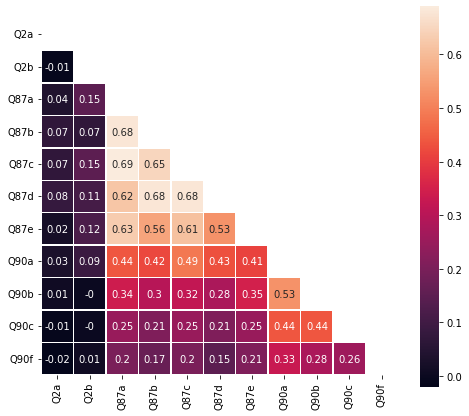

In [220]:
corr = ewcs.corr().round(2)
mask = np.triu(np.ones_like(corr, dtype=bool))

corr_graph = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, mask=mask, square =True, linewidths=.5, annot=True)
corr_graph.figure.set_size_inches(8,7)

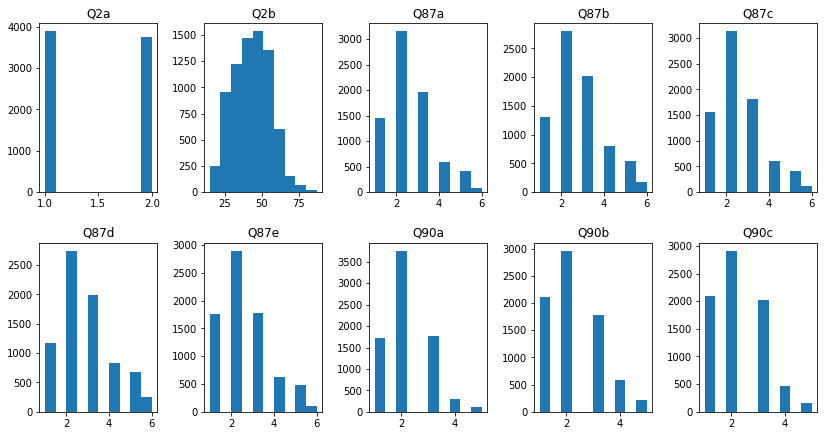

In [221]:
fig, axs = plt.subplots(2, 5)
fig.set_size_inches(12,6)
ind = 0
col = ewcs.columns
for i in range(2):
  for j in range(5):
    if (i == 1 & j == 4): break
    axs[i, j].hist(ewcs[col[ind]])
    axs[i, j].set_title(col[ind])
    ind += 1
plt.subplots_adjust(left=0.1, bottom=0.1, right=1, top=1, wspace=0.4, hspace=0.3)

In [222]:
scaler = StandardScaler()
ewcs_sc = scaler.fit_transform(ewcs)

pca = PCA()
pca.fit(ewcs_sc)
X_pca = pca.transform(ewcs_sc)

In [223]:
print('Explained variance per principal component:', pca.explained_variance_)

Explained variance per principal component: [4.40407884 1.41002258 1.02140148 0.94220439 0.78012683 0.56211592
 0.50841493 0.4251664  0.35486229 0.31925576 0.27378922]


In [224]:
#plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.5, s=20, cmap='coolwarm')

cluster.biplot(cscore=X_pca, loadings=pca.components_, labels=ewcs.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2))

Biplot


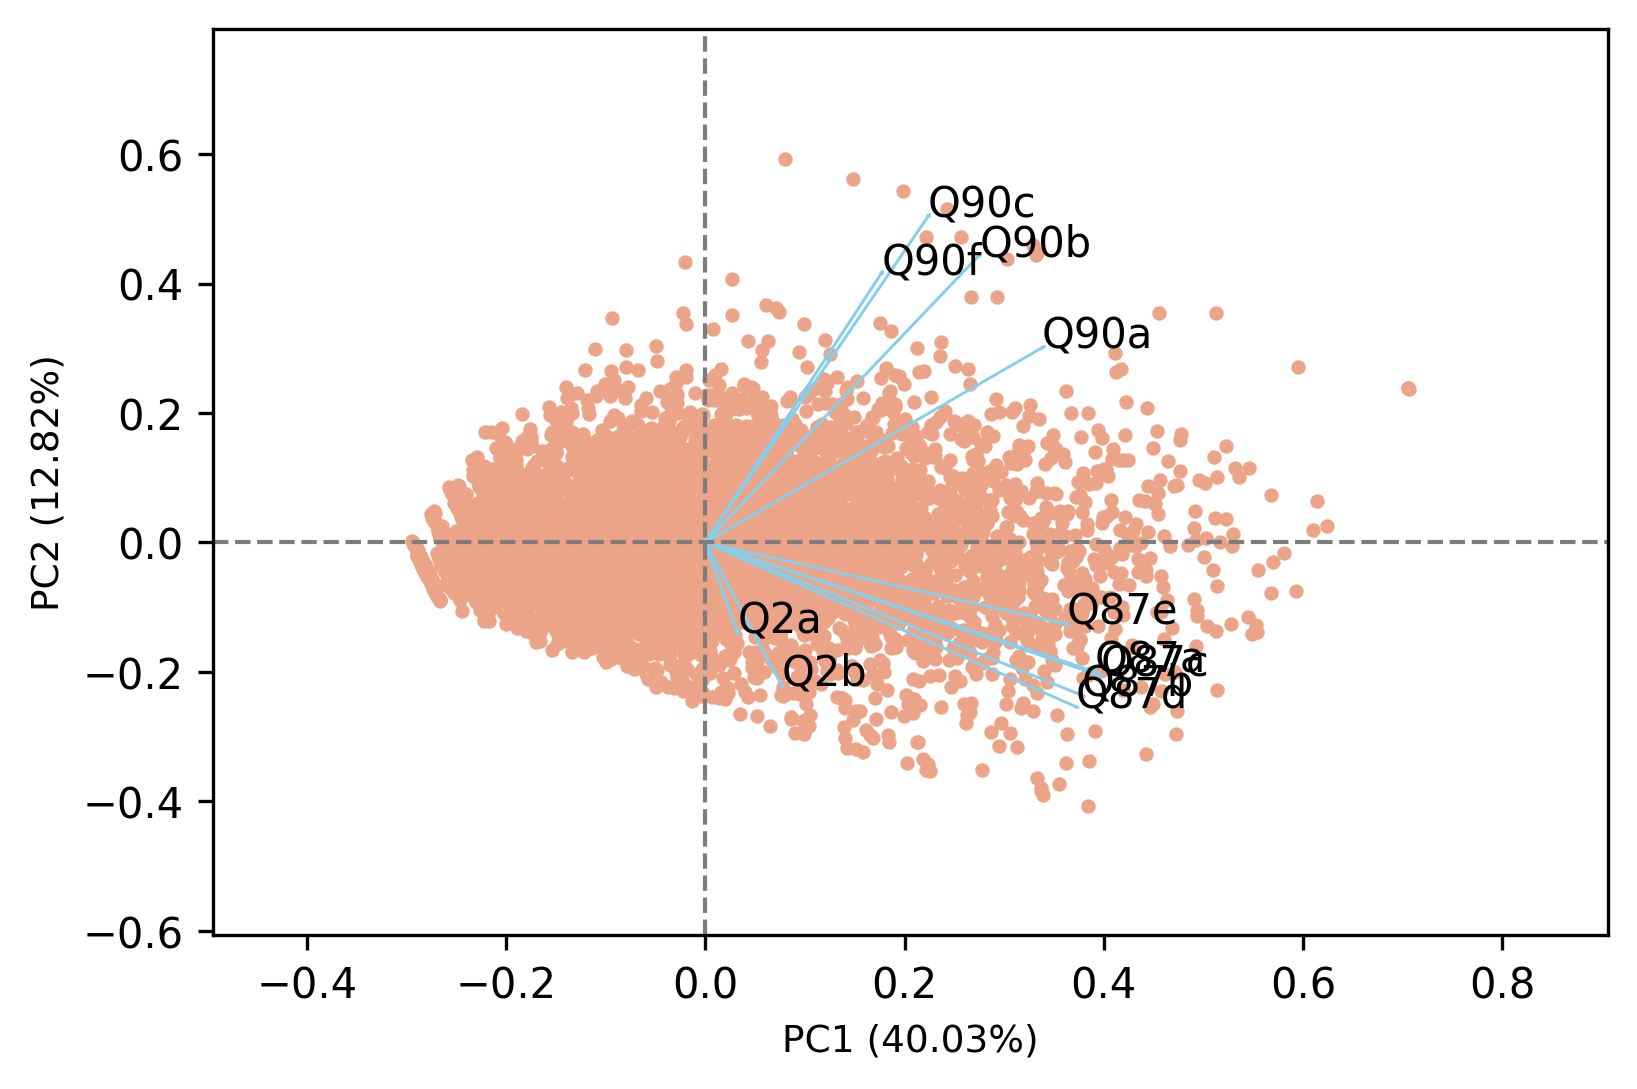

In [225]:
from IPython.display import Image
print('Biplot')
display(Image('biplot_2d.png', width=600, height=400))

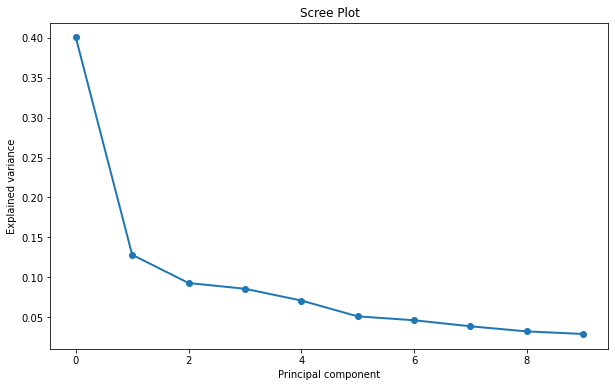

In [226]:
k = 10
plt.figure(figsize=(10, 6))
plt.plot(pca.explained_variance_ratio_[:k], marker='o', lw=2)
plt.title('Scree Plot')
plt.xlabel('Principal component')
plt.ylabel('Explained variance')
plt.show()

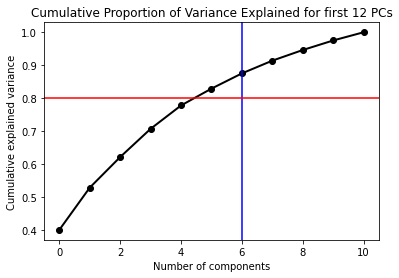

In [227]:
k = 12
plt.plot(np.cumsum(pca.explained_variance_ratio_[:k]), color='k', marker='o', lw=2)
plt.yticks(np.arange(0.4, 1.1, 0.1))
plt.axvline(6, c='b')
plt.axhline(0.8, c='r')
plt.title('Cumulative Proportion of Variance Explained for first {} PCs'.format(k))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [228]:
df2dim = X_pca[:, :2]
y = KMeans(n_clusters=3 ,random_state=2, max_iter=11)
y.fit(df2dim)

KMeans(max_iter=11, n_clusters=3, random_state=2)

In [229]:
def custom_colorbar(k=10): 
  cb = plt.colorbar()
  labels = np.arange(1,k)
  loc = labels - 1
  cb.set_ticks(loc)
  cb.set_ticklabels(labels)

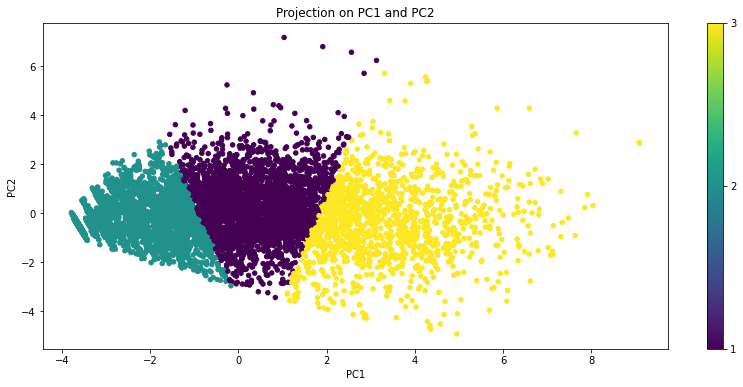

In [230]:
plt.figure(figsize=(14, 6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y.labels_, s=20)
plt.title('Projection on PC1 and PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
custom_colorbar()
plt.show()

# Part 2

In [267]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as LR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error as mse, r2_score as r2, mean_absolute_error as mea

from sklearn.preprocessing import LabelBinarizer


from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression


Task: Build a regression model for the variable G3 (final grade) without using the variables G1 and G2. Interpret the model and assess its predictive performance.

In [258]:
school1 = pd.read_csv('student-mat.csv', sep = ';')

school2 = pd.read_csv('student-por.csv', sep = ';')

dX_mat = school1.copy()
dX_mat = pd.get_dummies(dX_mat, columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 
                                'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 
                                'activities', 'nursery', 'higher', 'internet', 'romantic'])
dX_mat.drop(columns=['G1', 'G2', 'G3'], inplace=True)
y_m = school1['G3']

dX_por = school2.copy()
dX_por = pd.get_dummies(dX_por, columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 
                                'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 
                                'activities', 'nursery', 'higher', 'internet', 'romantic'])

dX_por.drop(columns=['G1', 'G2', 'G3'], inplace=True)
y_por = school2['G3']

dX_mat.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


In [260]:
dX_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 56 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                649 non-null    int64
 1   Medu               649 non-null    int64
 2   Fedu               649 non-null    int64
 3   traveltime         649 non-null    int64
 4   studytime          649 non-null    int64
 5   failures           649 non-null    int64
 6   famrel             649 non-null    int64
 7   freetime           649 non-null    int64
 8   goout              649 non-null    int64
 9   Dalc               649 non-null    int64
 10  Walc               649 non-null    int64
 11  health             649 non-null    int64
 12  absences           649 non-null    int64
 13  school_GP          649 non-null    uint8
 14  school_MS          649 non-null    uint8
 15  sex_F              649 non-null    uint8
 16  sex_M              649 non-null    uint8
 17  address_R       

In [261]:
dX_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 56 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                395 non-null    int64
 1   Medu               395 non-null    int64
 2   Fedu               395 non-null    int64
 3   traveltime         395 non-null    int64
 4   studytime          395 non-null    int64
 5   failures           395 non-null    int64
 6   famrel             395 non-null    int64
 7   freetime           395 non-null    int64
 8   goout              395 non-null    int64
 9   Dalc               395 non-null    int64
 10  Walc               395 non-null    int64
 11  health             395 non-null    int64
 12  absences           395 non-null    int64
 13  school_GP          395 non-null    uint8
 14  school_MS          395 non-null    uint8
 15  sex_F              395 non-null    uint8
 16  sex_M              395 non-null    uint8
 17  address_R       

In [279]:
dX_mat.describe().round(2)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
count,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,...,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00
mean,16.70,2.75,2.52,1.45,2.04,0.33,3.94,3.24,3.11,1.48,...,0.49,0.51,0.21,0.79,0.05,0.95,0.17,0.83,0.67,0.33
std,1.28,1.09,1.09,0.70,0.84,0.74,0.90,1.00,1.11,0.89,...,0.50,0.50,0.40,0.40,0.22,0.22,0.37,0.37,0.47,0.47
min,15.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,16.00,2.00,2.00,1.00,1.00,0.00,4.00,3.00,2.00,1.00,...,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00
50%,17.00,3.00,2.00,1.00,2.00,0.00,4.00,3.00,3.00,1.00,...,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00
75%,18.00,4.00,3.00,2.00,2.00,0.00,5.00,4.00,4.00,2.00,...,1.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,1.00
max,22.00,4.00,4.00,4.00,4.00,3.00,5.00,5.00,5.00,5.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [262]:
np.random.seed(17)
X_train_mat, X_test_mat, y_train_mat, y_test_mat = tts(dX_mat, y_m, test_size=0.2,random_state=17)
X_train_por, X_test_por, y_train_por, y_test_por = tts(dX_por, y_por, test_size=0.2,random_state=17)

In [264]:
linear_reg = LR()
lasso = Lasso()
ridge = Ridge()
svr = SVR()
rand_forest = RandomForestRegressor()

pred_y_train_mat, pred_y_test_mat = [], []
pred_y_train_por, pred_y_test_por = [], []

for i in [linear_reg, lasso, ridge, svr, rand_forest]:
  pred_y_train_mat.append(i.fit(X_train_mat, y_train_mat).predict(X_train_mat))
  pred_y_test_mat.append(i.fit(X_train_mat, y_train_mat).predict(X_test_mat))
  pred_y_train_por.append(i.fit(X_train_por, y_train_por).predict(X_train_por))
  pred_y_test_por.append(i.fit(X_train_por, y_train_por).predict(X_test_por))


In [268]:
metrics_test_arr_mat, metrics_test_arr_por = [], []
metrics_train_arr_mat, metrics_train_arr_por = [], []
for i in range(5):
  
  test, train = [], []
  for metrics in [r2,mse,mea]:
    test.append(metrics(y_test_mat, pred_y_test_mat[i]))
    train.append(metrics(y_train_mat, pred_y_train_mat[i]))
  metrics_test_arr_mat.append(test)
  metrics_train_arr_mat.append(train)
  
  test, train = [], []
  for metrics in [r2,mse,mea]:
    test.append(metrics(y_test_por, pred_y_test_por[i]))
    train.append(metrics(y_train_por, pred_y_train_por[i]))
    
  metrics_test_arr_por.append(test)
  metrics_train_arr_por.append(train)

In [269]:
result_test_mat = pd.DataFrame(metrics_test_arr_mat, index = ['Linear Regression', 'Lasso', 'Ridge', 'SVR', 'Random Forest'], 
                      columns = ['R^2', 'MSE', 'MAE'])
result_train_mat = pd.DataFrame(metrics_train_arr_mat, index = ['Linear Regression', 'Lasso', 'Ridge', 'SVR', 'Random Forest'], 
                      columns = ['R^2', 'MSE', 'MAE'])
result_test_por = pd.DataFrame(metrics_test_arr_por, index = ['Linear Regression', 'Lasso', 'Ridge', 'SVR', 'Random Forest'], 
                      columns = ['R^2', 'MSE', 'MAE'])
result_train_por = pd.DataFrame(metrics_train_arr_por, index = ['Linear Regression', 'Lasso', 'Ridge', 'SVR', 'Random Forest'], 
                      columns = ['R^2', 'MSE', 'MAE'])

In [275]:
for i in [result_test_mat, result_train_mat, result_test_por, result_train_por]:
  display(i)

,R^2,MSE,MAE
Linear Regression,0.231324,16.354659,3.186930
Lasso,0.035124,20.529078,3.398820
Ridge,0.236830,16.237519,3.176645
SVR,0.106034,19.020368,3.223672
Random Forest,0.364192,13.527699,2.693165


,R^2,MSE,MAE
Linear Regression,0.263691,15.353030,2.962797
Lasso,0.028086,20.265712,3.373258
Ridge,0.263600,15.354923,2.962868
SVR,0.082397,19.133248,3.197625
Random Forest,0.900166,2.081680,1.053987


,R^2,MSE,MAE
Linear Regression,0.300980,5.965909,1.836380
Lasso,-0.006491,8.590075,2.232949
Ridge,0.302797,5.950401,1.832644
SVR,0.198866,6.837417,1.881959
Random Forest,0.393393,5.177197,1.781385


,R^2,MSE,MAE
Linear Regression,0.359469,6.966823,1.904964
Lasso,0.005185,10.820238,2.433267
Ridge,0.359447,6.967064,1.904723
SVR,0.216083,8.526383,2.050132
Random Forest,0.891774,1.177133,0.778844


# Part 3

In [281]:
bank = pd.read_csv('bank.csv', sep=';')
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [284]:
bank.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,4521.0,NaN,NaN,NaN,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
job,4521,12,management,969,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,4521,3,married,2797,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,4521,4,secondary,2306,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,4521,2,no,4445,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,4521.0,NaN,NaN,NaN,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
housing,4521,2,yes,2559,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,4521,2,no,3830,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,4521,3,cellular,2896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,4521.0,NaN,NaN,NaN,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0


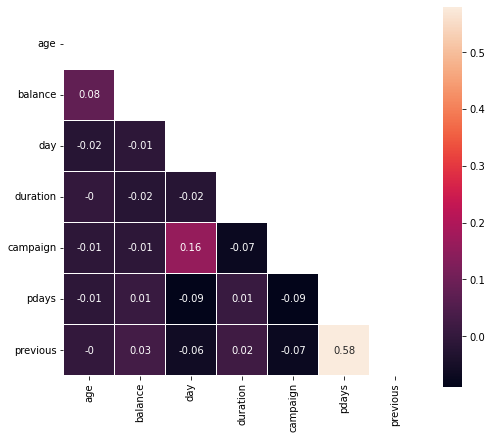

In [285]:
corr2 = bank.corr().round(2)
mask = np.triu(np.ones_like(corr2, dtype=bool))

corr_graph = sns.heatmap(corr2, 
            xticklabels=corr2.columns.values,
            yticklabels=corr2.columns.values, mask=mask, square =True, linewidths=.5, annot=True)
corr_graph.figure.set_size_inches(8,7)